In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('Payroll Data.csv')

print("Dataset Shape:", df.shape)
print("\nColumn Names:")
print(df.columns.tolist())

df.head(5)

C:\Users\nawaz\AppData\Local\Temp\ipykernel_22808\153983527.py:6: DtypeWarning: Columns (1,2,3,4,5,6,7,8,10,11,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,45,46) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Payroll Data.csv')


Dataset Shape: (685401, 47)

Column Names:
['Emp Count', 'Employee ID', 'First Name', 'Last Name', 'Business Unit Code', 'Busines Unit Name', 'Continuous Service Date', 'Country Name', 'Date Of Birth', 'Age', 'Age Range', 'Date Of Joining', 'Experience', 'Tenure', 'Date Of Termination', 'EfectiveStart Date', 'Effective End Date', 'Employee Catagery', 'Employee Status', 'Employee Type', 'Etinicity', 'Departments', 'Gender', 'Grade', 'Designations', 'Last Working Date', 'Leave Status', 'Country', 'Martial Status', 'Continent', 'Frequency', 'Payroll Employee Status', 'Payroll End Date', 'Payroll Start Date', 'Pay Period ', 'ReHire Date', 'Resignation Date', 'Basic Salary', 'Allowance', 'Statutory Bonus', 'Gross Salary', 'Arrear Special Allowance', 'Total Deductions', 'Arrear Statutory Bonus', 'Net Salary', 'Tax Spend', 'Reimbursement Paid']


,Emp Count,Employee ID,First Name,Last Name,Business Unit Code,Busines Unit Name,Continuous Service Date,Country Name,Date Of Birth,Age,...,Basic Salary,Allowance,Statutory Bonus,Gross Salary,Arrear Special Allowance,Total Deductions,Arrear Statutory Bonus,Net Salary,Tax Spend,Reimbursement Paid
0,1.0,1692406,NaN,NaN,NaN,NaN,NaN,India,NaN,20.0,...,55725.24,4785.05,23508.9,1400000.0,500.0,NaN,NaN,104500.0,"1,251,116","3,885,797"
1,2.0,1527750,NaN,NaN,NaN,NaN,NaN,India,NaN,20.0,...,139174.88,16340.50,23508.9,400000.0,1000.0,NaN,NaN,10390.0,"1,551,116","4,227,696"
2,3.0,1527991,Caylen,Forde,NaN,NaN,NaN,India,7-20-1984,38.0,...,245879.12,0.00,23508.9,100000.0,2000.0,8000.0,NaN,97400.0,"1,966,589","4,950,655"
3,4.0,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaN,India,NaN,20.0,...,101494.34,7824.99,23508.9,300000.0,500.0,1000.0,NaN,93500.0,"2,519,188","1,117,199"
4,5.0,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaN,India,NaN,20.0,...,101345.12,22284.37,23508.9,600000.0,500.0,1000.0,NaN,90500.0,"2,132,385","1,801,559"


In [2]:
# 1. Standardize column names (remove leading/trailing spaces)
df.columns = df.columns.str.strip()

# 2. Convert Salary columns to numeric (handling potential string formatting)
salary_cols = ['Basic Salary', 'Allowance', 'Statutory Bonus', 'Gross Salary', 'Total Deductions', 'Net Salary']
for col in salary_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0)

# 3. Clean categorical data
df['Departments'] = df['Departments'].fillna('Unassigned').str.strip()
df['Employee Status'] = df['Employee Status'].fillna('Unknown').str.strip()

# 4. Filter for only active employees if needed (comment out if all are needed)
# df_active = df[df['Employee Status'] == 'Active'].copy()

print("Data Cleaning Complete. Missing values handled.")
df.head()

Data Cleaning Complete. Missing values handled.


,Emp Count,Employee ID,First Name,Last Name,Business Unit Code,Busines Unit Name,Continuous Service Date,Country Name,Date Of Birth,Age,...,Basic Salary,Allowance,Statutory Bonus,Gross Salary,Arrear Special Allowance,Total Deductions,Arrear Statutory Bonus,Net Salary,Tax Spend,Reimbursement Paid
0,1.0,1692406,NaN,NaN,NaN,NaN,NaN,India,NaN,20.0,...,55725.24,4785.05,23508.9,1400000.0,500.0,0.0,NaN,104500.0,"1,251,116","3,885,797"
1,2.0,1527750,NaN,NaN,NaN,NaN,NaN,India,NaN,20.0,...,139174.88,16340.50,23508.9,400000.0,1000.0,0.0,NaN,10390.0,"1,551,116","4,227,696"
2,3.0,1527991,Caylen,Forde,NaN,NaN,NaN,India,7-20-1984,38.0,...,245879.12,0.00,23508.9,100000.0,2000.0,8000.0,NaN,97400.0,"1,966,589","4,950,655"
3,4.0,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaN,India,NaN,20.0,...,101494.34,7824.99,23508.9,300000.0,500.0,1000.0,NaN,93500.0,"2,519,188","1,117,199"
4,5.0,NaN,NaN,NaN,EL-ET-SG-11,Travel Inc.,NaN,India,NaN,20.0,...,101345.12,22284.37,23508.9,600000.0,500.0,1000.0,NaN,90500.0,"2,132,385","1,801,559"


In [3]:
# A. Average Salary by Department
dept_avg_salary = df.groupby('Departments')['Basic Salary'].mean().sort_values(ascending=False)

# B. Total Employee Cost (Company Liability)
# Formula: Basic + Allowances + Bonuses
df['Total_Employee_Cost'] = df['Basic Salary'] + df['Allowance'] + df['Statutory Bonus']
total_cost_per_dept = df.groupby('Departments')['Total_Employee_Cost'].sum()

overtime_metric = df.groupby('Departments')['Arrear Special Allowance'].sum()

print("--- Key Metrics Calculated ---")
metrics_summary = pd.DataFrame({
    'Avg Basic Salary': dept_avg_salary,
    'Total Dept Cost': total_cost_per_dept,
    'Total Special Allowances': overtime_metric
})
metrics_summary

--- Key Metrics Calculated ---


,Avg Basic Salary,Total Dept Cost,Total Special Allowances
Departments,,,
Finance,80102.136645,8.672900e+07,1081500.0
HR,84476.676522,1.395629e+07,210500.0
IT,83920.802355,3.846168e+07,795000.0
Management,82597.382861,7.646668e+07,1363000.0
Marketing,81384.638907,1.567541e+08,2689500.0
Unassigned,0.000000,0.000000e+00,0.0


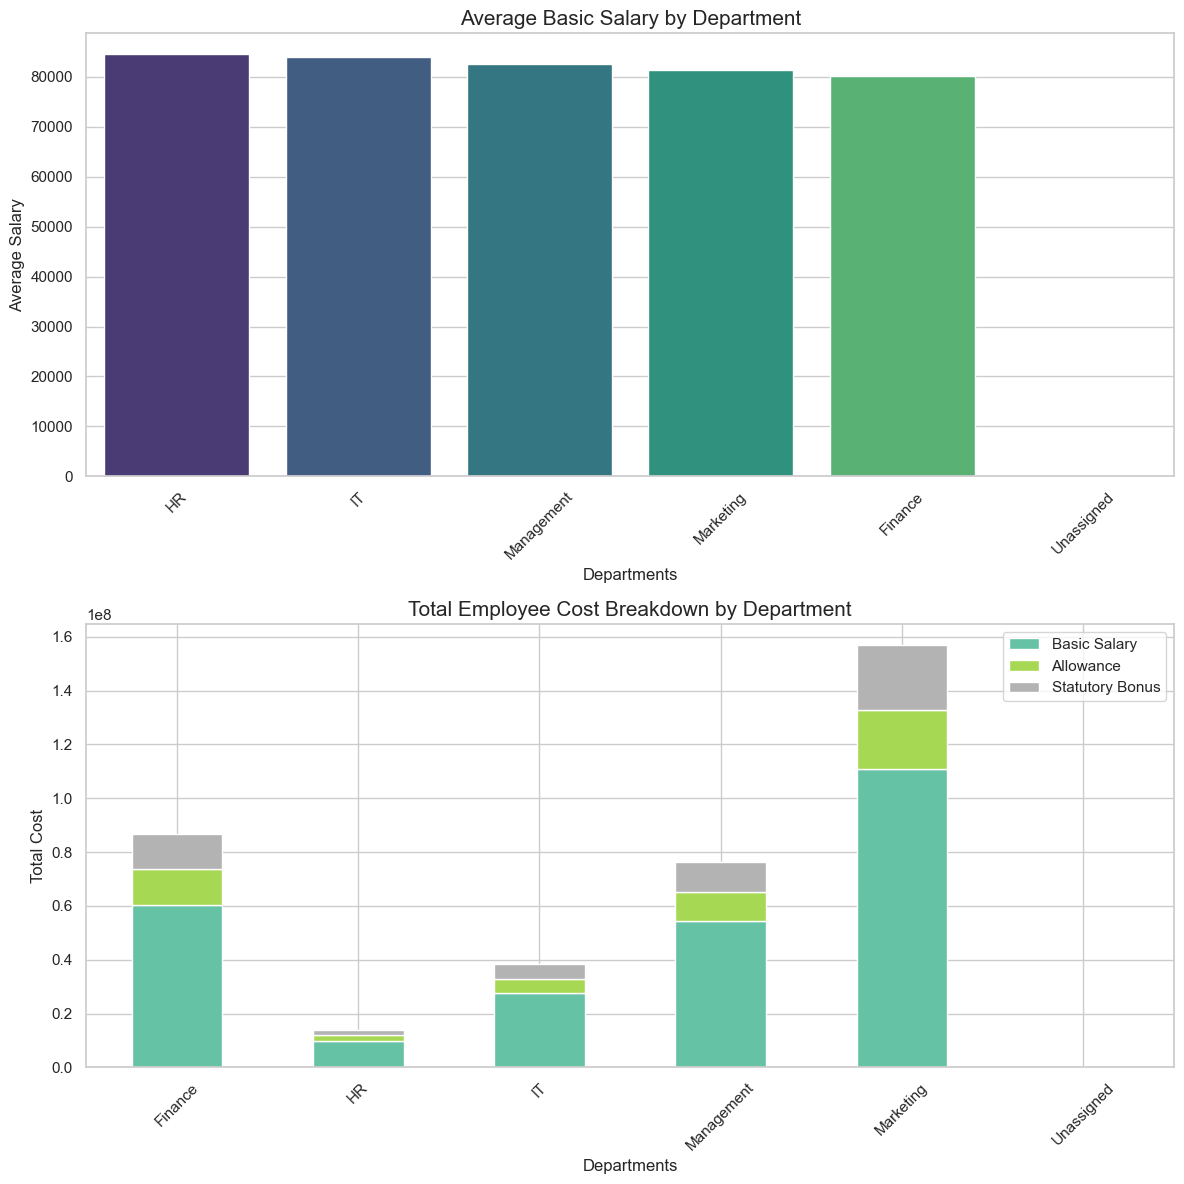

In [4]:

sns.set_theme(style="whitegrid")

fig, axes = plt.subplots(2, 1, figsize=(12, 12))

sns.barplot(x=dept_avg_salary.index, y=dept_avg_salary.values, ax=axes[0], palette="viridis")
axes[0].set_title('Average Basic Salary by Department', fontsize=15)
axes[0].set_ylabel('Average Salary')
axes[0].tick_params(axis='x', rotation=45)

dept_breakdown = df.groupby('Departments')[['Basic Salary', 'Allowance', 'Statutory Bonus']].sum()
dept_breakdown.plot(kind='bar', stacked=True, ax=axes[1], colormap="Set2")
axes[1].set_title('Total Employee Cost Breakdown by Department', fontsize=15)
axes[1].set_ylabel('Total Cost')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()